In [29]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [198]:
## printing original Image
def showOriginal(imagePath):
    img=cv2.imread(imagePath)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.figure(1)
    plt.title(imagePath[:-4])
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [206]:
def showDominantColors(colors):
    i=1
    l=len(centers)
    plt.figure(figsize=(4,2))
    
    for each_color in colors:
        plt.subplot(4,l,i)
        i+=1
        colorImage=np.zeros((100,100,3),dtype='uint8')
        colorImage[:,:,:]=each_color
        plt.imshow(colorImage)
        plt.axis('off')
        plt.show

def getColors(centers):
    colors=np.array(centers,dtype='uint8')
    return colors

def segmentImage(imagePath,k):
    
    #image preprocessing
    img=cv2.imread(imagePath)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    im=img.reshape(-1,3)
    
    #Fitting KMeans Model
    kmc=KMeans(n_clusters=k)
    kmc.fit(im)
    centers=kmc.cluster_centers_
    pred=kmc.labels_
    
    colors=getColors(centers)      ## changing centers(floating values) into integers
    showDominantColors(colors)     ## Extracting Colors swatches (dominant color of each cluster)
    
    a=img.shape[0]
    b=img.shape[1]
    
    transformed_img=np.zeros((a*b,3),dtype='uint8')
    for i in range(a*b):
        transformed_img[i]=colors[pred[i]]
    
    transformed_img=transformed_img.reshape((a,b,3))
    plt.figure('New Image')
    plt.imshow(transformed_img)
    plt.title('Segmented Image')
    plt.axis('off')
    plt.show()

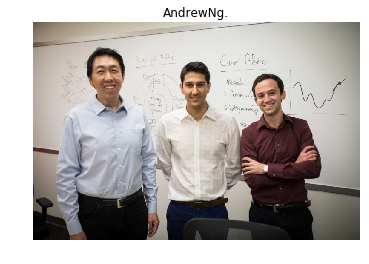

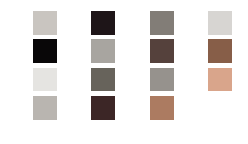

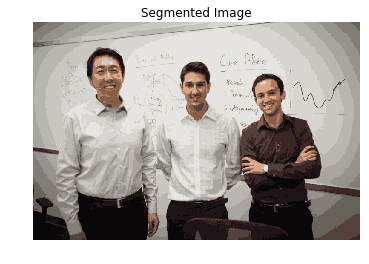

In [215]:
showOriginal('AndrewNg.jpeg')
segmentImage('AndrewNg.jpeg',15)

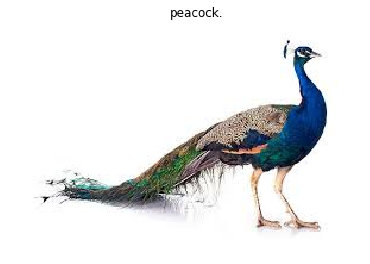

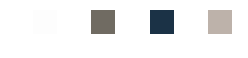

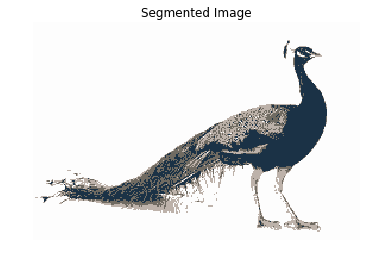

In [212]:
showOriginal('peacock.jpeg')
segmentImage('peacock.jpeg',4)

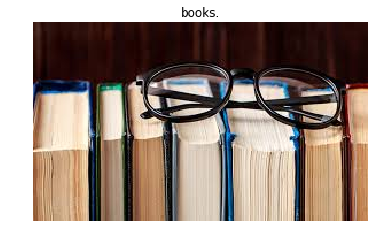

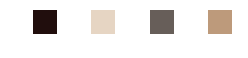

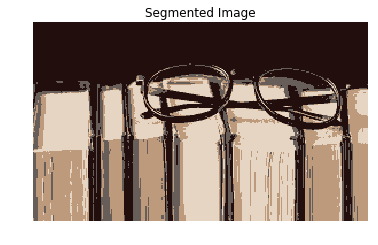

In [213]:
showOriginal('books.jpeg')
segmentImage('books.jpeg',4)